## **PROYECTO FINAL**
### REGRESIÓN

y = β0 + β1 ∗ x

donde

- y es la variable dependiente,
- x es la variable independiente,
- β0 es el intercepto de la recta,
- β1 es la pendiente de la recta.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
path_root = os.getcwd()
file_name = 'proyecto_training_data.npy'
full_path = f"{path_root}\\{file_name}"

training_data = np.load(full_path)

In [6]:
training_data.shape

(1460, 6)

## Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validacion y pruebas(20 %).

In [7]:
# 1420
# 80% = 1420
# 20% = 292

x,y = training_data.shape
#print(x,y)

x = int(x*0.8)


train = training_data[0:x,:]
test = training_data[x:,:]

print(train.shape)
print(test.shape)

(1168, 6)
(292, 6)


In [8]:
df_train = pd.DataFrame(train)
df_train = df_train.set_axis(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'], axis=1)

df_test = pd.DataFrame(test)
df_test = df_test.set_axis(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'], axis=1)

In [9]:
df_train

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


## 3. Analisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas):
- media
- valor maximo
- valor mınimo
- rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
- desviacion estandar

In [10]:
df_t = pd.DataFrame(df_train)
df_t.describe()

### SALES PRICE = Y DEPENDIENTE

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


## 4. Para cada variable en el dataset usar seaborn(funcion distplot) para graficar un histograma de la variable.

In [25]:
def displayGraphics(df):
    columnas = df.columns.values
    for i in columnas:
        sns.displot(df, x=df[i], kind="kde")
        plt.show()

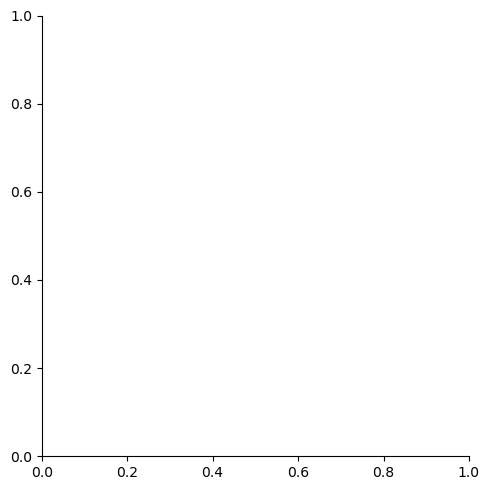

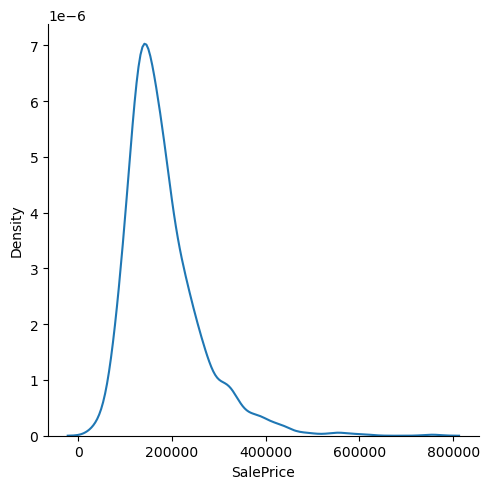

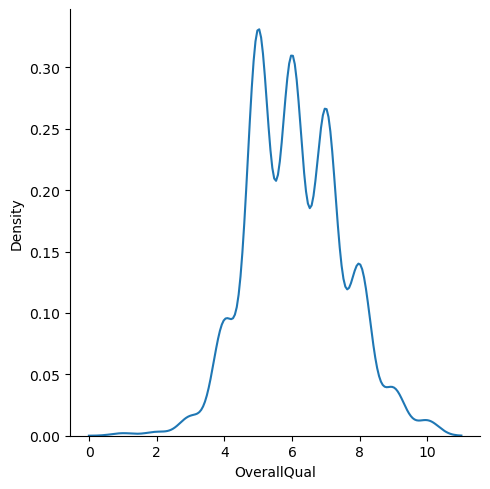

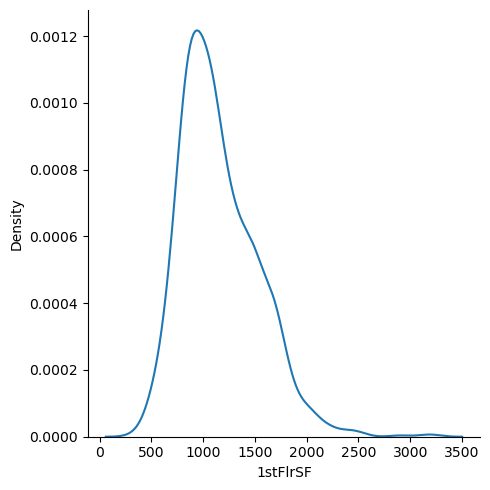

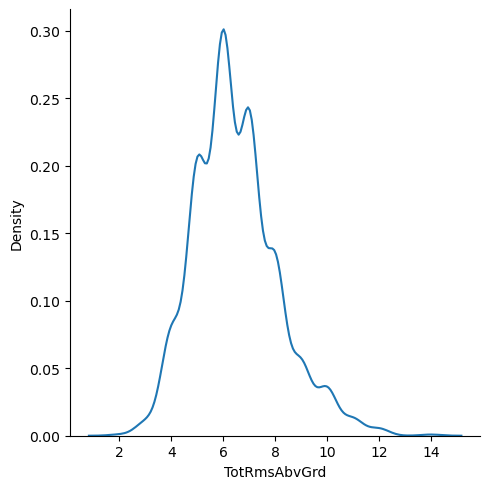

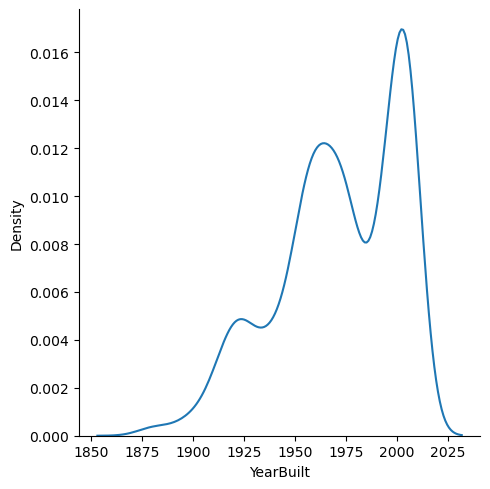

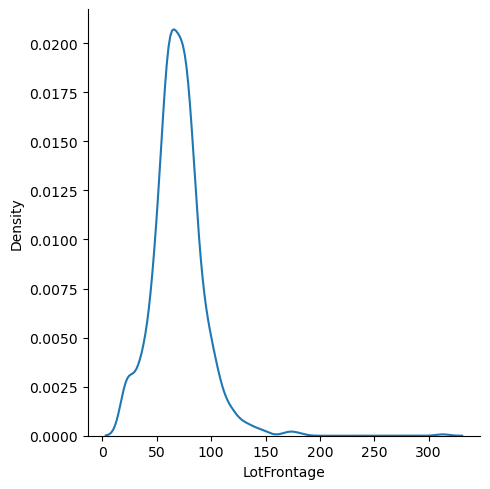

In [22]:
displayGraphics(df_t)

## 5. Para cada variable independiente x :
- Calcular el coeficiente de correlaci´on entre x y y.
- Graficar x vs y(scatterplot) usando matplotlib.
- Colocar el coeficiente de correlaci´on y colocarlo como parte del t´ıtulo de la gr´afica.
- Basado en la gr´afica y el coeficiente de correlaci´on de cada par x,y elegir las 2 variables con m´as potencial predictivo es decir las 2 variables que presentan mayor correlaci´on entre dicha variable y la variable dependiente.

## OBTENER COEFICIENTE DE CORRELACION

In [36]:
#df_t.corr()
#corr = df_t['YearBuilt'].corr(df_t['SalePrice'])

#print('El coeficiente de correlación entre x e y es:', corr)

df_corr = df_t.corr().iloc[0]
df_corr

SalePrice       1.000000
OverallQual     0.793990
1stFlrSF        0.616289
TotRmsAbvGrd    0.564707
YearBuilt       0.534171
LotFrontage     0.363292
Name: SalePrice, dtype: float64

In [39]:
def displayGraphicsScatterplot(df):
    df_corr = df.corr().iloc[0]

    columnas = df.columns.values
    for i in columnas:
        plt.scatter(df_t[i], df_t['SalePrice'])
        plt.title(f"X vs Y - Coeficiente de Correlacion: {df_corr[i]}")
        plt.xlabel(i)
        plt.ylabel('y')
        plt.show()

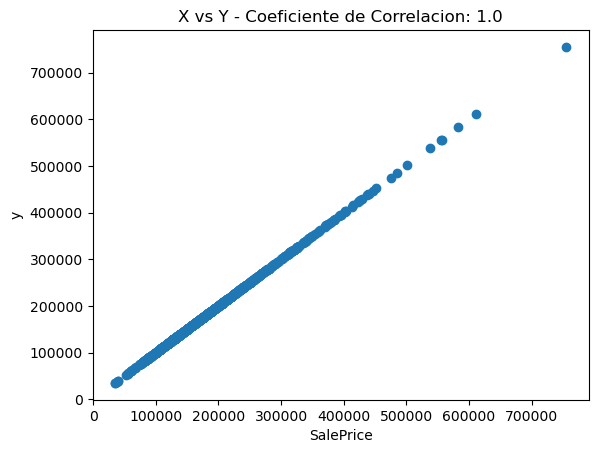

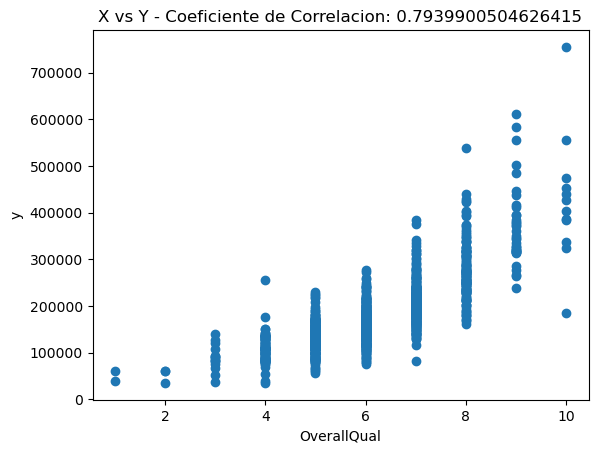

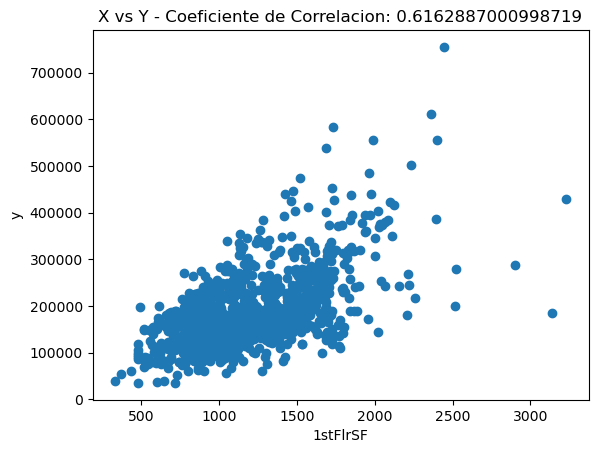

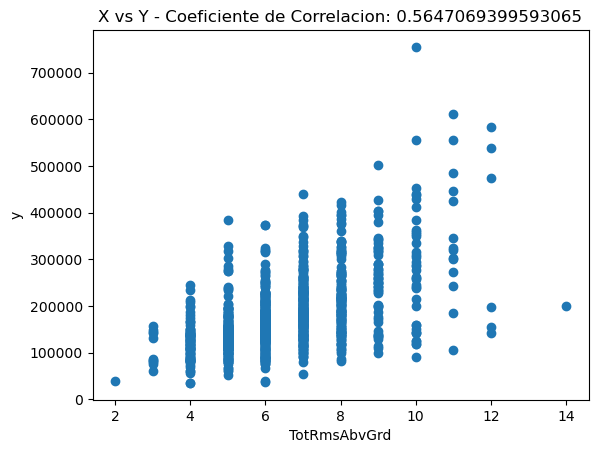

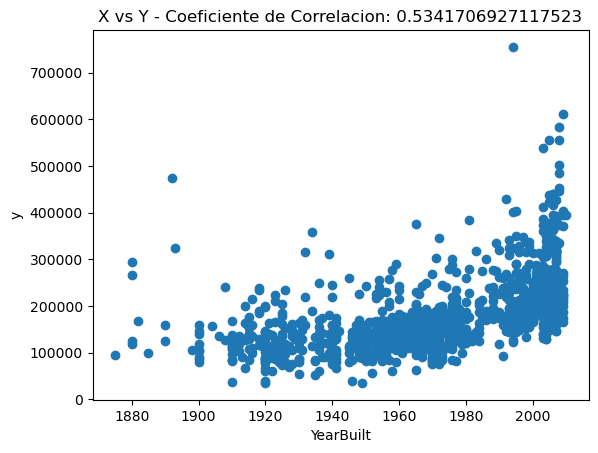

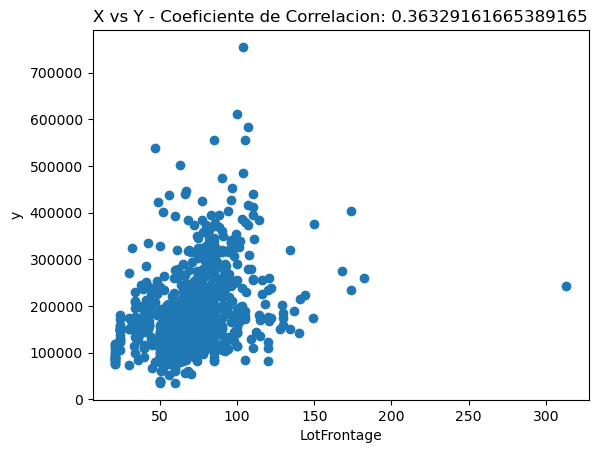

In [40]:
displayGraphicsScatterplot(df_t)

## Tomar 2 variables con mayor correlacion

### OverallQual: 0.793990
### 1stFlrSF: 0.616289

In [48]:
df_t['OverallQual']

0       7.0
1       6.0
2       7.0
3       7.0
4       8.0
       ... 
1163    4.0
1164    5.0
1165    7.0
1166    8.0
1167    6.0
Name: OverallQual, Length: 1168, dtype: float64

Epoch 0: error = 38819444106.4435
Epoch 10: error = 2786148908.413139
Epoch 20: error = 2780234177.6007795
Epoch 30: error = 2775648823.675298
Epoch 40: error = 2771106741.32726
Epoch 50: error = 2766607477.1844177
Epoch 60: error = 2762150627.598008
Epoch 70: error = 2757735792.726041
Epoch 80: error = 2753362576.4958916
Epoch 90: error = 2749030586.568669
Epoch 100: error = 2744739434.304085
Epoch 110: error = 2740488734.725548
Epoch 120: error = 2736278106.485654
Epoch 130: error = 2732107171.831947
Epoch 140: error = 2727975556.573057
Epoch 150: error = 2723882890.045095
Epoch 160: error = 2719828805.0784373
Epoch 170: error = 2715812937.9647684
Epoch 180: error = 2711834928.424437
Epoch 190: error = 2707894419.5741544
Epoch 200: error = 2703991057.894987
Epoch 210: error = 2700124493.2005806
Epoch 220: error = 2696294378.605833
Epoch 230: error = 2692500370.4957147
Epoch 240: error = 2688742128.4944267
Epoch 250: error = 2685019315.4349246
Epoch 260: error = 2681331597.328637
Epoc

C:\Users\LAPTOP-ERICK\AppData\Local\Temp\ipykernel_11284\3751762865.py:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  grad = np.mean((y_pred - y)[:, np.newaxis] * X, axis=0)


Epoch 330: error = 2656472827.999364
Epoch 340: error = 2653054217.5878973
Epoch 350: error = 2649667834.4117217
Epoch 360: error = 2646313374.664749
Epoch 370: error = 2642990537.40484
Epoch 380: error = 2639699024.526871
Epoch 390: error = 2636438540.735931
Epoch 400: error = 2633208793.520864
Epoch 410: error = 2630009493.128019
Epoch 420: error = 2626840352.535243
Epoch 430: error = 2623701087.4261513
Epoch 440: error = 2620591416.1645923
Epoch 450: error = 2617511059.769415
Epoch 460: error = 2614459741.889428
Epoch 470: error = 2611437188.778575
Epoch 480: error = 2608443129.2714286
Epoch 490: error = 2605477294.7588315
Epoch 500: error = 2602539419.163788
Epoch 510: error = 2599629238.917644
Epoch 520: error = 2596746492.9363656
Epoch 530: error = 2593890922.5971985
Epoch 540: error = 2591062271.715391
Epoch 550: error = 2588260286.521257
Epoch 560: error = 2585484715.6374044
Epoch 570: error = 2582735310.0561733
Epoch 580: error = 2580011823.117285
Epoch 590: error = 2577314010

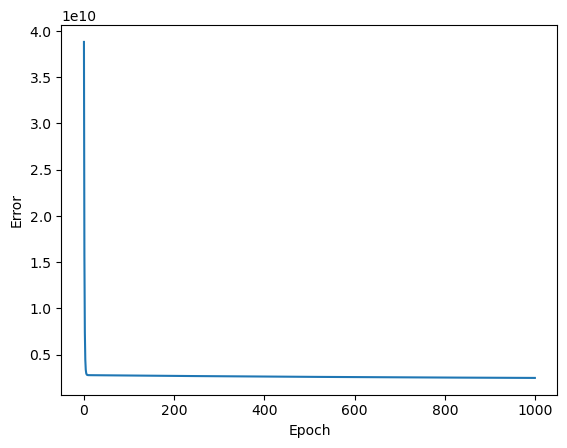

In [54]:
def train_linear_regression(x, y, epochs, print_error_each, alpha):
    # Crear matriz de características X
    X = np.vstack([x, np.ones(len(x))]).T
    
    # Inicializar parámetros del modelo
    beta = np.zeros(2)
    
    # Inicializar vector de errores
    errors = np.zeros(epochs)
    
    # Entrenar modelo por el número de epochs especificado
    for epoch in range(epochs):
        # Calcular predicción
        y_pred = np.dot(X, beta)
        
        # Calcular error
        error = np.mean((y_pred - y)**2)
        
        # Almacenar error
        errors[epoch] = error
        
        # Imprimir error cada print_error_each epochs
        if epoch % print_error_each == 0:
            print(f"Epoch {epoch}: error = {error}")
        
        # Calcular gradientes
        grad = np.mean((y_pred - y)[:, np.newaxis] * X, axis=0)
        
        # Actualizar parámetros
        beta -= alpha * grad
    
    return beta, errors

# Entrenar modelo con los datos de ejemplo
beta, errors = train_linear_regression(df_t['OverallQual'], df_t['SalePrice'], epochs=1000, print_error_each=10, alpha=0.01)

# Imprimir parámetros del modelo
print("Parámetros del modelo:")
print(f"beta0 = {beta[1]:.2f}")
print(f"beta1 = {beta[0]:.2f}")

# Graficar errores
import matplotlib.pyplot as plt
plt.plot(range(len(errors)), errors)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()